---

# LAB3. Train, Test and Evaluate a Regression Model  

---

#### Don't forget to fill out your notebook and send it at the end of the session to Nourhene.Ben-Rabah@univ-paris1.fr


# Dataset 
In this notebook, we will use the **steel industry energy consumption dataset**. This is one of the most recently published datasets that integrates energy consumption data collected using several IoT devices from a small smart steel industry in South Korea. The steel industry produces several types of coils, steel plates and iron plates. 



# Define task 
The task is to make prediction about the energy consumption of the steel industry from a set of metrics. The Usage_kWh is the target variable that ML models must predict.

# Information About Dataset


In [52]:
import pandas as pnd
df_steel = pnd.read_csv(r"C:\Users\haphu\Documents\M2 MIAGE\Machine Learning\Datasets\Steel_industry_data.csv")
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [53]:
df_steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


#### Correlation coefficient
The degree of association is measured by a *correlation coefficient*, denoted by *r*. It is sometimes called *Pearson’s correlation coefficient* after its originator and is a measure of linear association.
The correlation coefficient is measured on a scale that varies from + 1 through 0 to – 1. Complete correlation between two variables is expressed by either  + 1 or -1 .
When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. 

*Complete absence of correlation* is represented by *0*.

In [54]:
df_steel.corr(numeric_only=True)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


In [55]:
#Compute pairwise correlation of columns
#df_steel.corr()

**a) What do you think from these results?**

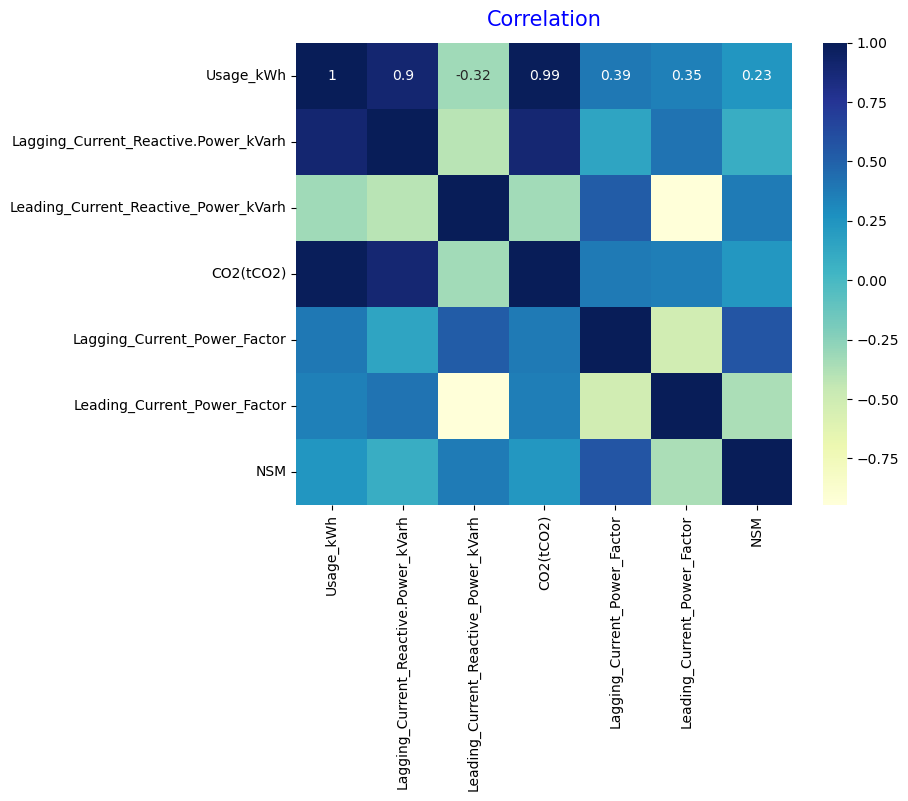

In [56]:
#Visualize the correlation using a heatmap
#heatmap is a plot of rectangular data as a color-encoded matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,6))
sns.heatmap(df_steel.corr(numeric_only=True), annot = True, cmap = 'YlGnBu')
plt.title("Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

The cmap parameter provides the colormap. A good colormap is to find a good representation.  Matplotlib provides us with several color maps, you can see them all here (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).In our example we used *YlGnBu*.

**b) Let's test other!**

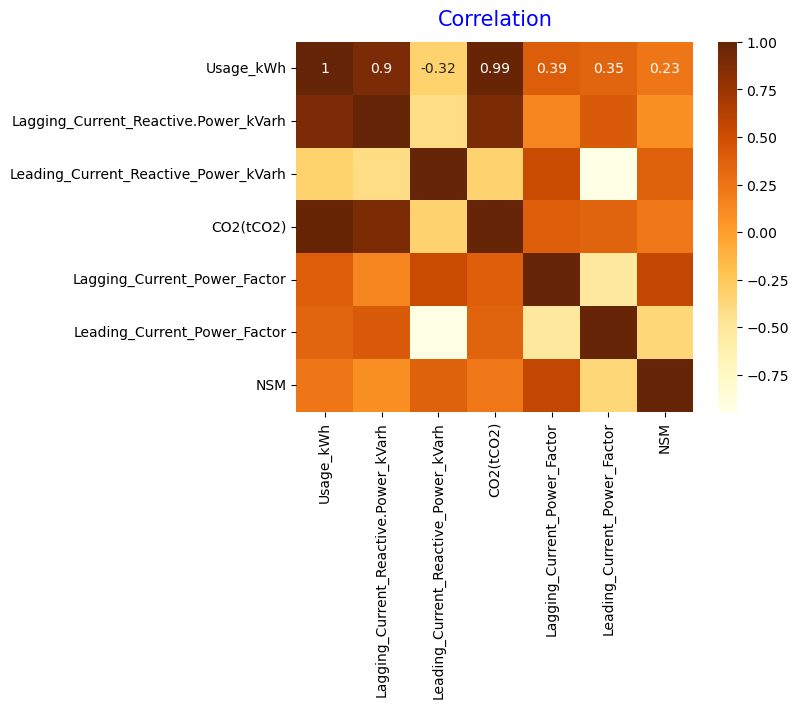

In [57]:
sns.heatmap(df_steel.corr(numeric_only=True), annot = True, cmap = 'YlOrBr')
plt.title("Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

# Data transformation 
 Define the DataFrame index using the date column 

In [46]:
df_steel = df_steel.set_index('date')
df_steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


The data to be analyzed consists of two types: numerical data and categorical data (object type). Most ML models require that the categorical data must be in a numeric format to work properly. Therefore, it is important to convert data of type object  into *numerical values*, which is called encoding.

You have already seen an encoder of type *One Hot* and now you will see another one of type *Label Encoder* 
We have 3 columns to encode: WeekStatus, Day_of_week and Load_Type    

In [47]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode the WeekStatus
df_steel['WeekStatus']= label_encoder.fit_transform(df_steel['WeekStatus'])
df_steel['WeekStatus'].unique()
df_steel. head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,Monday,Light_Load


**c) Encode the other columns**

**d) So, what is the principle of label Encoder**  => Il encode les Label Encoder avec valeur numérique

**e) What are the limitations of Label Encoder** 

In [58]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode the WeekStatus
df_steel['WeekStatus']= label_encoder.fit_transform(df_steel['WeekStatus'])
df_steel['WeekStatus'].unique()

# Encode the Day of week
df_steel['Day_of_week']= label_encoder.fit_transform(df_steel['Day_of_week'])
df_steel['Day_of_week'].unique()

df_steel['Load_Type']= label_encoder.fit_transform(df_steel['Load_Type'])
df_steel['Load_Type'].unique()

df_steel. head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


# Split Data to Train and Test 

#  Data scaling/normalization 
The final step (optional) before the data is passed to ML algorithms is to scale the data. You can see that some columns of the dataset contain small values, while the others contain very large values. It is better to convert all values to
a uniform scale. 

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_steel.drop('Usage_kWh', axis=1)
y = df_steel['Usage_kWh']


X_train, X_test, y_train, y_test = train_test_split(df_steel, y, test_size=0.3, random_state=42)

#scaling the training set
X_train = scaler.fit_transform(X_train)
#scaling the test set
X_test = scaler.transform (X_test)



array([[-7.08467852e-01, -4.74432244e-01, -5.23143072e-01, ...,
        -6.35236046e-01,  5.01947560e-01, -8.84389357e-01],
       [-7.37493810e-01, -5.67949585e-01, -5.23143072e-01, ...,
         1.57421797e+00,  1.99751730e-03, -8.84389357e-01],
       [-6.96498384e-01, -5.39033039e-01, -5.23143072e-01, ...,
        -6.35236046e-01,  1.50184765e+00,  2.81048893e-01],
       ...,
       [-4.10128876e-01, -7.89438026e-01,  1.40282488e+00, ...,
         1.57421797e+00, -4.97952526e-01,  2.81048893e-01],
       [-6.77347236e-01, -5.32265337e-01, -5.23143072e-01, ...,
        -6.35236046e-01,  1.00189760e+00, -8.84389357e-01],
       [-6.15704479e-01, -7.98051465e-01,  2.17159925e+00, ...,
        -6.35236046e-01,  5.01947560e-01,  1.44648714e+00]])

# Create and train models
**f) Start by creating, training and evaluating the algorithms seen in the course: LinearRegression and Decision Tree Regressor**

Use the *Mean Absolute Error (MAE)*, *training time* and *prediction time* to evaluate the models performance

*MAE* is the mean of the absolute values of the individual prediction errors on all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance. The closer the measure is to zero, the better the performance, while the higher the measure, the worse the performance.

Let's visualize the linear regression model 

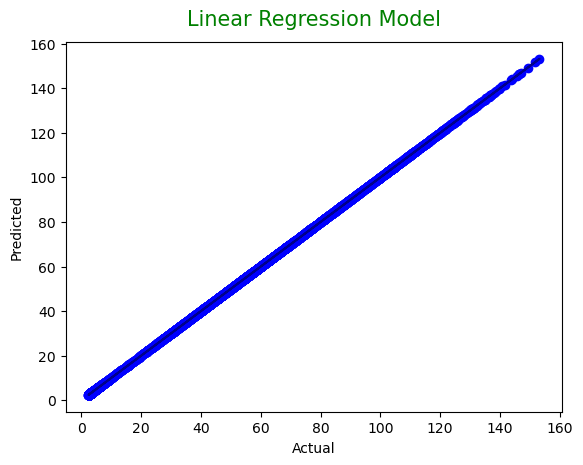

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
# Création le modèle de linear regression
linear_reg = LinearRegression()

#Entrainer modèl 
linear_reg.fit(X_train, y_train)

#Prédire le modèle
y_pred = linear_reg.predict(X_test)

#visualize model
x = y_test
y = y_pred
plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**g) Let's visualize the Decision Tree model** 

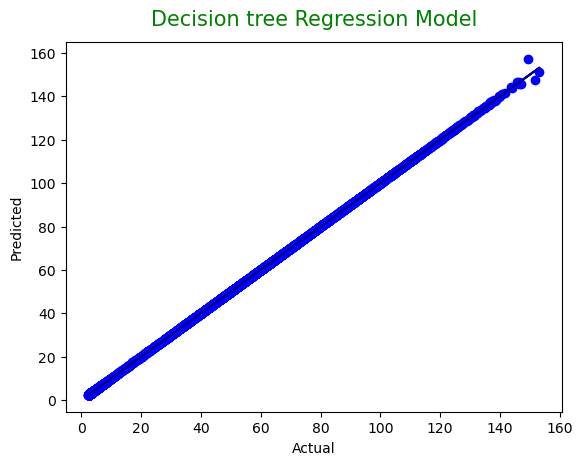

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=100)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
x = y_test
y = y_pred
plt.title('Decision tree Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**h) You will now test other regression algorithms such as KNN, Random Forest and SVR**

**j) Compare the performance of these models and determine the best model**

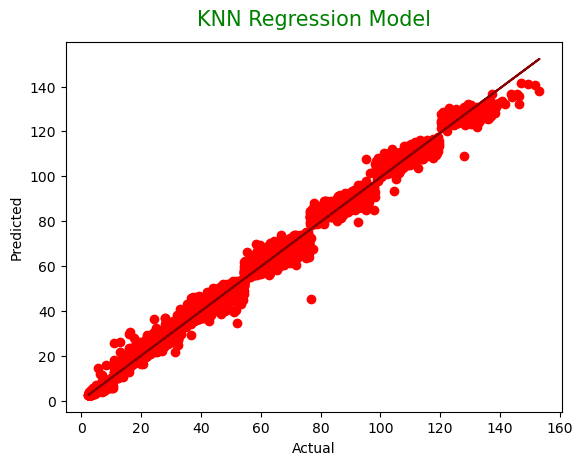

In [61]:
#KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
plt.title('K-nearest neighbor Model', fontsize=15, color='g', pad=12)
plt.plot(y_test, y_pred_knn, 'o', color='r')
m_knn, b_knn = np.polyfit(y_test, y_pred_knn, 1)
plt.plot(y_test, m_knn * y_test + b_knn, color='darkred')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


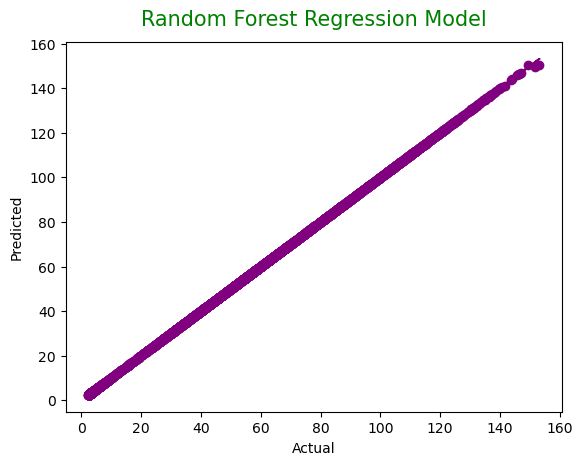

In [62]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor
modele_rf = RandomForestRegressor() 
modele_rf.fit(X_train, y_train)
y_pred_rf = modele_rf.predict(X_test)

plt.title('Random Forest Regression Model', fontsize=15, color='g', pad=12)
plt.plot(y_test, y_pred_rf, 'o', color='purple')
m_rf, b_rf = np.polyfit(y_test, y_pred_rf, 1)
plt.plot(y_test, m_rf * y_test + b_rf, color='purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# Iterate!
At this point, you can go back to the previous steps to try to make improvements to the model (consider changing the hyperparameters of the models).


# Exercice 
Using the Diamonds dataset, train a regression algorithm of your choice, which predicts the price of the diamond.
Perform all the preprocessing steps.